In [1]:
from micrograd.neural_network import MLP
from micrograd.engine import Value
from traceGraph import traceGraph

In [2]:
import numpy as np
from matplotlib import pyplot as plt

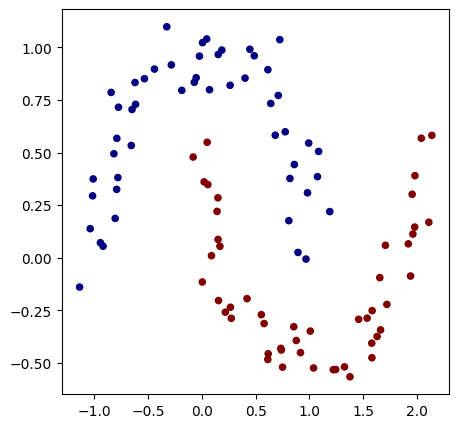

In [3]:
# make up a dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples= 100, noise=0.1)
y=y*2-1
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],c=y,s=20,cmap='jet')

In [4]:
model = MLP(2,[16, 16, 1]) # 2layer neural network
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [map(Value, xrow) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss 
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(Data =1.0110152422831338 and Grad = 0.0) 0.5


In [5]:
for k in range(1000):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
        

    if k % 500 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 1.0110152422831338, accuracy 50.0%
step 500 loss 1.0141302123154199, accuracy 50.0%
